Student name: ESPINOUX Jules

Student id: 24267228

# Task: Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

i= 0 0 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
 144 123  23   0   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1   1   1   0
 200 232 232 233 229 223 223 215 213 164 1

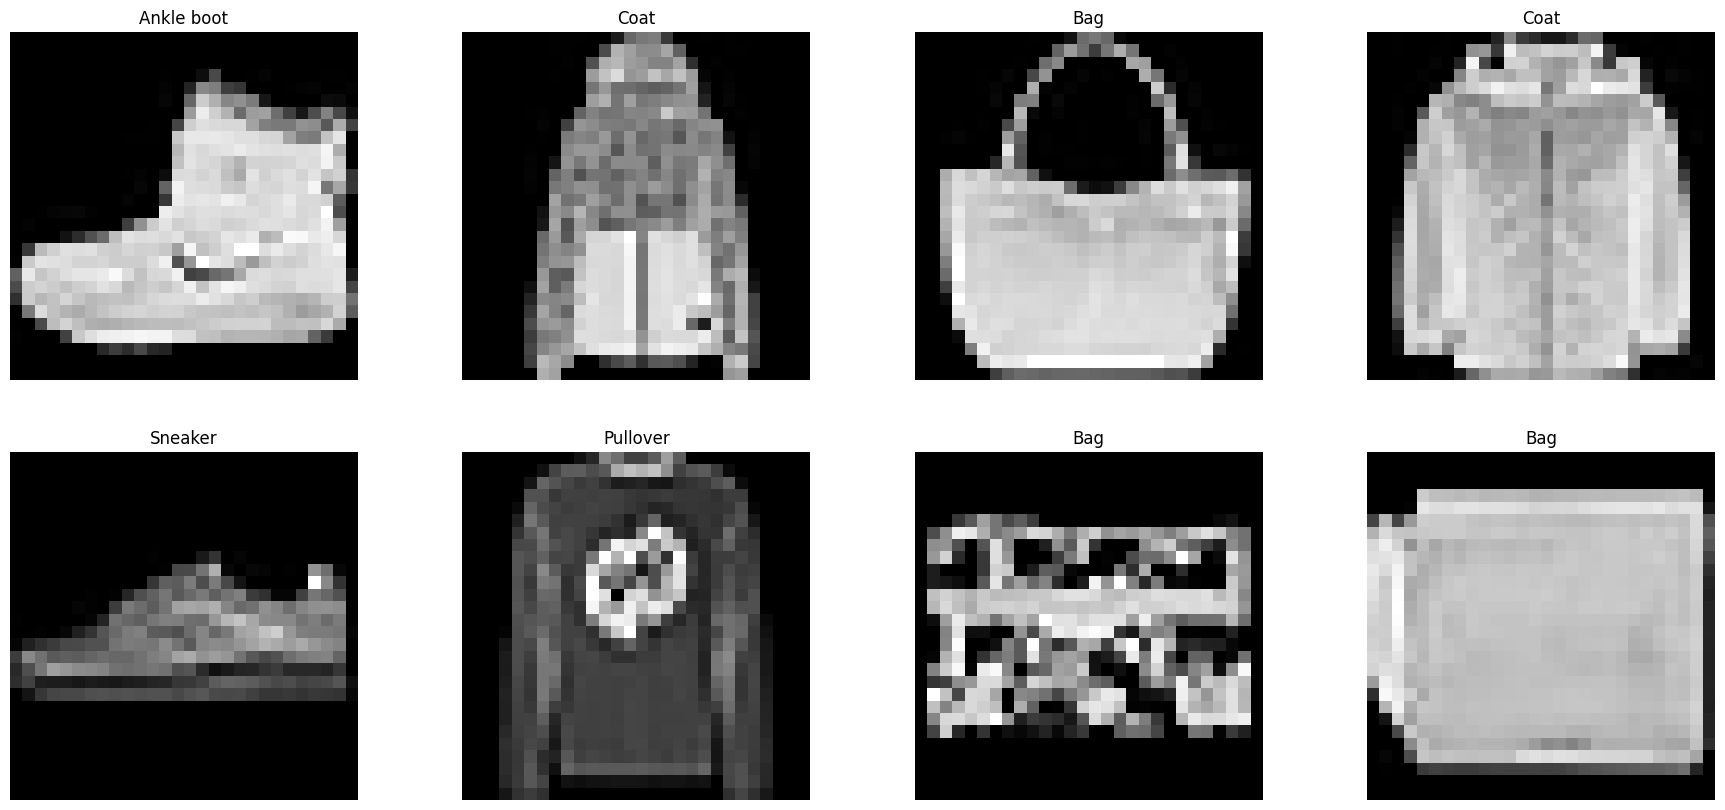

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    print("i= " + str(i) + " " + str(index[i]) + " " + str(X[index[i]]))
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

############################


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
 


## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Perceptron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the digit that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

In [69]:
from sklearn.linear_model import Perceptron as Perceptron 

##################

perceptron = Perceptron()
perceptron.fit(X_train_transformed, y_train)
y_predicted = perceptron.predict(X_test_transformed)



In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

##################

score = accuracy_score(y_test, y_predicted)

print(score)


0.8115714285714286


<font color='red'>Enter your text here.</font>

The accuracy is quite good for a perceptron !

['4' '7' '0' '7' '9' '3' '7' '2' '5' '4' '3' '4' '4' '6' '6']
['2' '7' '0' '7' '9' '2' '7' '6' '5' '4' '3' '6' '2' '0' '6']


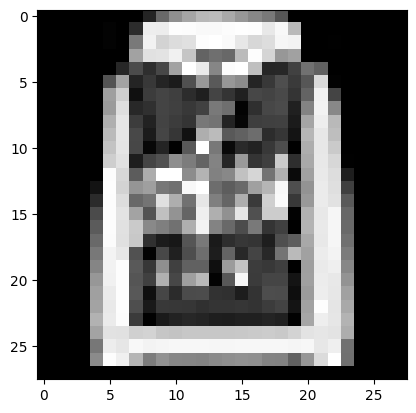

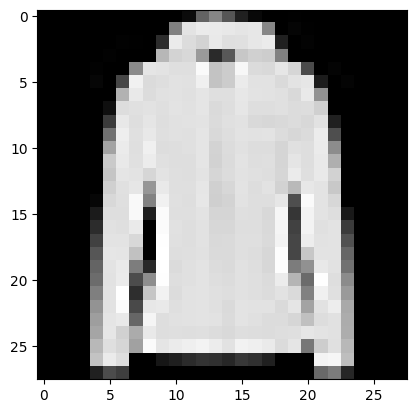

In [ ]:
#### 4 ####

print(y_predicted[0:15])
print(y_test[0:15])

plt.figure()
plt.imshow(np.reshape(X_test[0], (-1, 28)), cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.imshow(np.reshape(X_test[9], (-1, 28)), cmap='gray', vmin=0, vmax=255)


Both items are similar which may cause the incorrect classification.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happening on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [136]:
from sklearn.neural_network import MLPClassifier

#######################

mlp = MLPClassifier(hidden_layer_sizes=(20,), alpha=0.1, verbose=True, random_state=1)

mlp.fit(X_train_transformed, y_train)

y_train_pred = mlp.predict(X_train_transformed)
y_test_pred = mlp.predict(X_test_transformed)


Iteration 1, loss = 0.63982681
Iteration 2, loss = 0.43309333
Iteration 3, loss = 0.39753066
Iteration 4, loss = 0.37727725
Iteration 5, loss = 0.36473861
Iteration 6, loss = 0.35406314
Iteration 7, loss = 0.34652351
Iteration 8, loss = 0.34180317
Iteration 9, loss = 0.33441681
Iteration 10, loss = 0.33036474
Iteration 11, loss = 0.32661593
Iteration 12, loss = 0.32187934
Iteration 13, loss = 0.31980492
Iteration 14, loss = 0.31658098
Iteration 15, loss = 0.31249897
Iteration 16, loss = 0.31143816
Iteration 17, loss = 0.30885581
Iteration 18, loss = 0.30687183
Iteration 19, loss = 0.30333655
Iteration 20, loss = 0.30351777
Iteration 21, loss = 0.30051948
Iteration 22, loss = 0.29833242
Iteration 23, loss = 0.29844625
Iteration 24, loss = 0.29638867
Iteration 25, loss = 0.29463795
Iteration 26, loss = 0.29338758
Iteration 27, loss = 0.29279986
Iteration 28, loss = 0.29166540
Iteration 29, loss = 0.29030085
Iteration 30, loss = 0.28960588
Iteration 31, loss = 0.28718995
Iteration 32, los

In [137]:
from sklearn.metrics import accuracy_score

#######################
# Your accuracy score code here

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.9264107142857143
0.8697857142857143


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>Enter your text here</font>

1. The size of the input layer corresponds to the number of features in the dataset. In this case, the dataset has 20 features (from make_classification), so the size of the input layer is 20.

2. The size of the output layer corresponds to the number of classes in the classification problem, so here there are 10 output layers.

3. Input-hidden weights=20×20=400

4. When the training accuracy and test accuracy differ, it highlights the generalization ability of the model = the extent to which the model can perform well on unseen data (test set) compared to the data it was trained on (training set). 

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

<font color='red'>Enter your code here</font>

c:\Users\jules\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


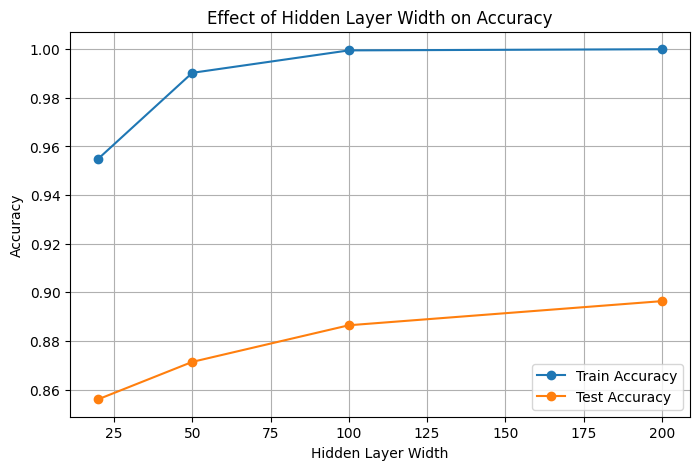

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

########################
# Your classifier training code here

a_test = []
a_train = []

widths = (20, 50, 100, 200)

for width in widths:
    mlp = MLPClassifier(hidden_layer_sizes=(width,), alpha=0.001, random_state=42, max_iter=200, verbose=False)
    
    mlp.fit(X_train_transformed, y_train)
    
    y_train_pred = mlp.predict(X_train_transformed)
    y_test_pred = mlp.predict(X_test_transformed)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    a_train.append(train_accuracy)
    a_test.append(test_accuracy)

# Plot the results
plt.figure()
plt.plot(widths, a_train, label='Train Accuracy', marker='o')
plt.plot(widths, a_test, label='Test Accuracy', marker='o')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Width on Accuracy')
plt.show()



Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>Enter your text here</font>

1. With the width increasing, the amount of parameters increases a lot, the model has to compute more and more parameters and this is what takes a lot a time (18 minutes).

2. It is clear that the wider Hidden Layer, the more accurate the model is. But it takes a lot of time to run !

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

c:\Users\jules\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


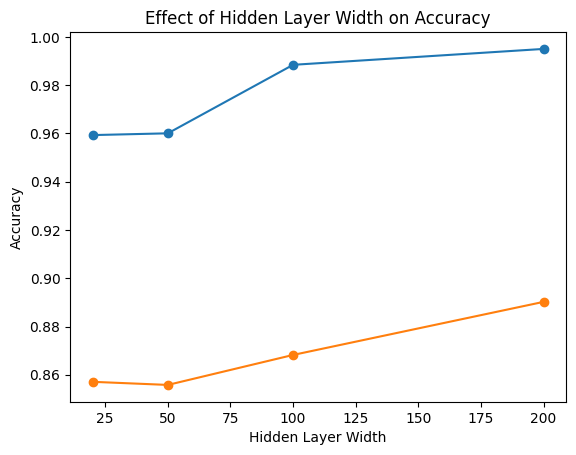

In [151]:
########################
# Your classifier training code here

layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []

for layer in layers:
    mlp = MLPClassifier(hidden_layer_sizes=layer, alpha=0.001, random_state=42, max_iter=200, verbose=False)
    
    mlp.fit(X_train_transformed, y_train)
    
    y_train_pred = mlp.predict(X_train_transformed)
    y_test_pred = mlp.predict(X_test_transformed)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    a_train.append(train_accuracy)
    a_test.append(test_accuracy)

# Plot the results
plt.figure()
plt.plot(widths, a_train, label='Train Accuracy', marker='o')
plt.plot(widths, a_test, label='Test Accuracy', marker='o')
plt.xlabel('Hidden Layer Width')
plt.ylabel('Accuracy')
plt.title('Effect of Hidden Layer Width on Accuracy')
plt.show()


#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>Enter your text here</font>

The accuracy of the model clearly improves with the Hidden Layer Width.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

<font color='red'>Enter your code here</font>

In [154]:
########################
# Your code here


from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_pred))


[[1195    2   24   32    5    1  127    0    8    0]
 [   8 1376    0    9    3    1    2    0    3    0]
 [  23    1 1180   12   95    2   87    0    7    0]
 [  41   12   19 1275   52    0   47    0    3    0]
 [   5    3  143   29 1083    0   88    0    6    0]
 [   1    0    0    2    0 1415    0   18    4    9]
 [ 166    4  109   34   76    0 1009    0    9    0]
 [   1    0    0    0    0   43    0 1277    2   36]
 [   5    2    7    5    4   10    8    3 1297    1]
 [   0    0    0    0    0   29    0   47    2 1356]]


<font color='red'>Enter your text here</font>

The confusion matrix shows strong overall performance, with most predictions along the diagonal, indicating correct classifications. However, there are some misclassifications, such as class 6 frequently being predicted as class 0 (166 times) and class 2 confused with class 4 (95 times). Classes like 1, 5, 7, and 9 are well-classified with few errors. Improving feature separation for confused pairs like class 2 vs. 4 and class 6 vs. 0 could significantly enhance accuracy.